In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lensless.hardware.mask import MultiLensArray

/home/bezzam/LenslessPiCam/lensless/hardware/mask.py:588: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(radius**2 - (x - loc[1]) ** 2 - (y - loc[0]) ** 2)


(380, 507)
float32
53.147243 1946.1357


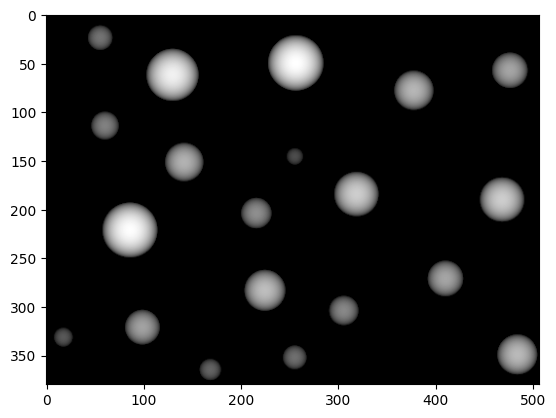

In [2]:
downsample = 8
dz = 0.002  # 2mm
n_lens = 20
radius_range = [100e-6, 400e-6]
min_height = 10e-6
is_torch = False
torch_device = "cuda:0"
min_separation = 5e-4
verbose=False

mask = MultiLensArray.from_sensor(
    sensor_name="rpi_hq", 
    downsample=downsample, 
    distance_sensor=dz, 
    N=n_lens, 
    refractive_index=1.45,
    is_torch=is_torch, 
    torch_device=torch_device,
    radius_range=radius_range, 
    min_height=min_height,
    seed=2,
    min_separation=min_separation,
    verbose=verbose
)

# plot phase pattern
if is_torch:
    phase_pattern = mask.phi.cpu().numpy()
    mask_radius = mask.radius.cpu().numpy()
    mask_loc = mask.loc.cpu().numpy()
else:
    phase_pattern = mask.phi
    mask_radius = mask.radius
    mask_loc = mask.loc
print(phase_pattern.shape)
print(phase_pattern.dtype)
print(np.min(phase_pattern), np.max(phase_pattern))

plt.imshow(phase_pattern, cmap="gray")

In [3]:
# pad mask into frame
frame_size = (1e-2, 1.3e-2)

# determine padding
pad_x = (frame_size[0] - mask.size[0]) / 2
pad_y = (frame_size[1] - mask.size[1]) / 2
pad = [pad_x, pad_y]
print(pad)

[0.002644, 0.0033566]


In [4]:
assert pad_x >= 0 and pad_y >= 0
assert frame_size[0] >= mask.size[0] and frame_size[1] >= mask.size[1]

# convert and round to um
mask_radius = np.round(mask_radius * 1e6)
mask_min_height = np.round(mask.min_height * 1e6)
mask_loc = np.round((mask_loc + pad) * 1e6)
mask_size = np.round(np.array(mask.size) * 1e6)
frame_size = np.round(np.array(frame_size) * 1e6)
refractive_index = mask.refractive_index

print("Mask radius: ", mask_radius)
print("Mask min height: ", mask_min_height)
print("Mask loc: ", mask_loc)
print("Mask size: ", mask_size)
print("Frame size: ", frame_size)
print("Refractive index: ", refractive_index)

mask_dict = {
    "n_lens": len(mask_radius),
    "radius": mask_radius.tolist(),
    "min_height": mask_min_height,
    "loc": mask_loc.tolist(),
    "mask_size": mask_size.tolist(),
    "frame_size": frame_size.tolist(),
    "refractive_index": refractive_index,
}

# write to JSON
import json
with open("multi_lens_array.json", "w") as f:
    json.dump(mask_dict, f, indent=4)

Mask radius:  [356. 354. 336. 286. 286. 265. 259. 254. 248. 231. 231. 226. 199. 190.
 180. 161. 155. 140. 124. 108.]
Mask min height:  10.0
Mask loc:  [[5817. 3974.]
 [3707. 6100.]
 [4249. 4124.]
 [6590. 5643.]
 [8442. 5713.]
 [5423. 6869.]
 [8637. 7686.]
 [7319. 4322.]
 [4396. 5236.]
 [7721. 6719.]
 [8542. 4067.]
 [3865. 7338.]
 [5315. 5886.]
 [6428. 7126.]
 [3389. 4772.]
 [3328. 3652.]
 [5804. 7723.]
 [4729. 7879.]
 [2859. 7467.]
 [5806. 5164.]]
Mask size:  [4712. 6287.]
Frame size:  [10000. 13000.]
Refractive index:  1.45
